### McDonald's Customer Segmentation - Classification

![cover_image](cover_image.jpg)

[Mcdonalds dataset for customer segmentation](https://drive.google.com/file/d/1sVYQ5LohAPDYC8CdRh2OO8SEVUdrZBUT/view?usp=sharing)

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

data = pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.shape

(1453, 15)

In [5]:
data.isnull().sum() # No missing values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

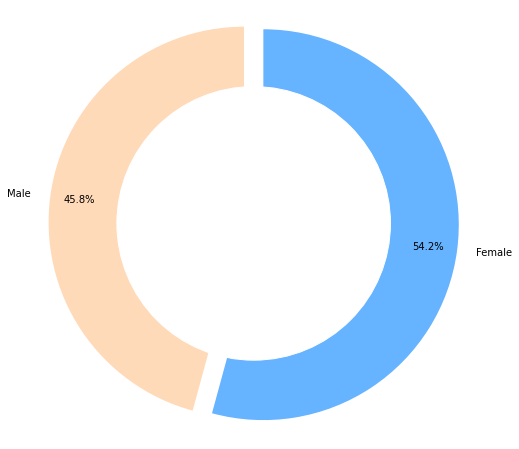

In [7]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

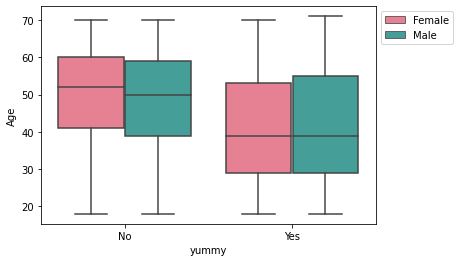

In [9]:
sns.boxplot(data = data, x = 'yummy', y = 'Age', hue='Gender', palette='husl')
plt.legend(bbox_to_anchor = (1,1))

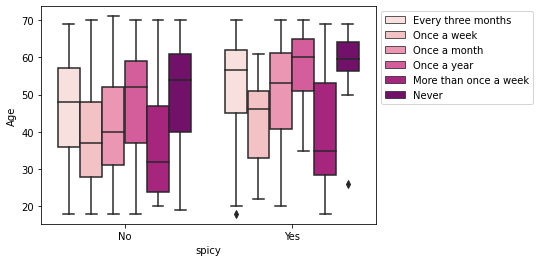

In [10]:
sns.boxplot(data = data, x = 'spicy', y = 'Age', hue='VisitFrequency', palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

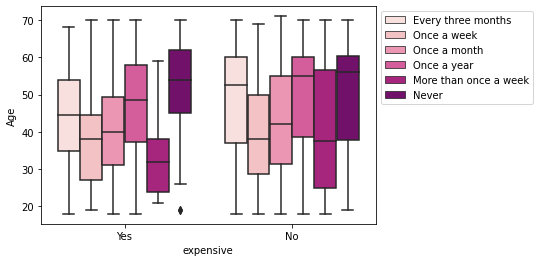

In [12]:
sns.boxplot(data = data, x = 'expensive', y = 'Age', hue='VisitFrequency',  palette='RdPu')
plt.legend(bbox_to_anchor = (1,1))

In [5]:
print(f"Max age: {data['Age'].max()}")
print(f"Min age: {data['Age'].min()}")

Max age: 71
Min age: 18


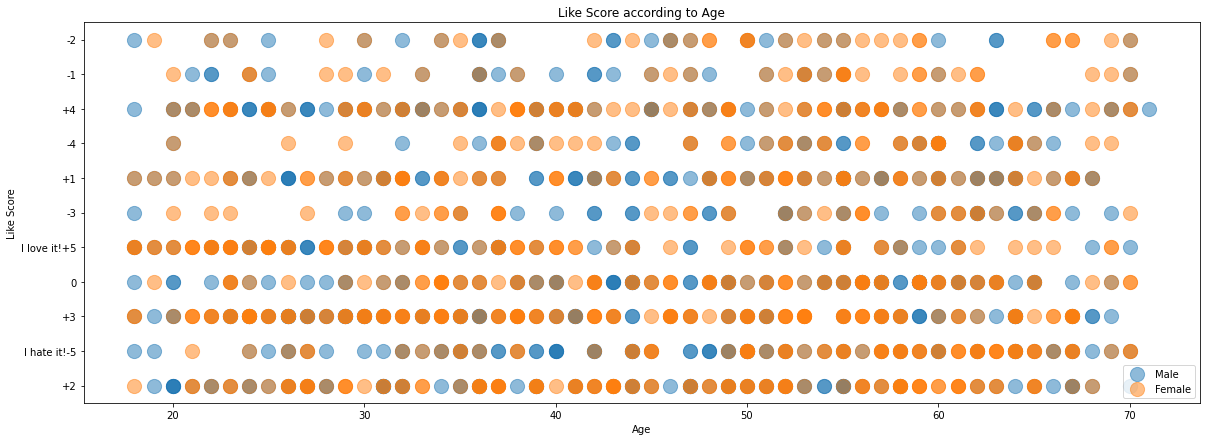

In [13]:
plt.figure(figsize=(20,7))
gender = ['Male', 'Female']
for i in gender:
    plt.scatter(x='Age',y='Like', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Like Score")
plt.title("Like Score according to Age")
plt.show()


In [6]:
# Converting age into categorical variable
data['Age'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 60, 100], labels=['0-18', '18-25', '25-35', '35-60', '60+'])

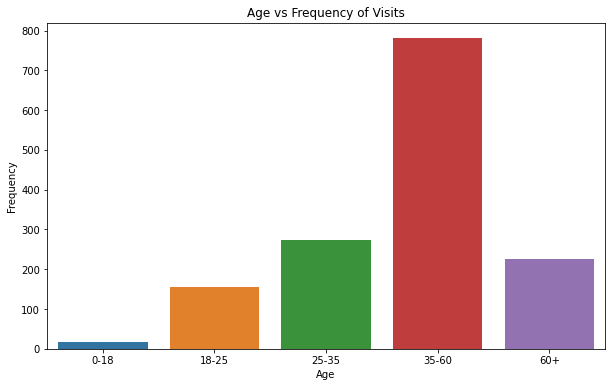

In [7]:
# Age vs frequency of visits

plt.figure(figsize=(10,6))
sns.countplot(x='Age', data=data)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency of Visits')
plt.show()

In [8]:
data.dtypes

yummy               object
convenient          object
spicy               object
fattening           object
greasy              object
fast                object
cheap               object
tasty               object
expensive           object
healthy             object
disgusting          object
Like                object
Age               category
VisitFrequency      object
Gender              object
dtype: object

In [9]:
# Value counts for Like

data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [10]:
# mapping the labels to integer values

data['Like'] = data['Like'].map({'I love it!+5':5, '+4':4, '+3':3, '+2':2, '+1':1, '0':0, '-1':-1, '-2':-2, '-3':-3, '-4':-4, 'I hate it!-5':-5})

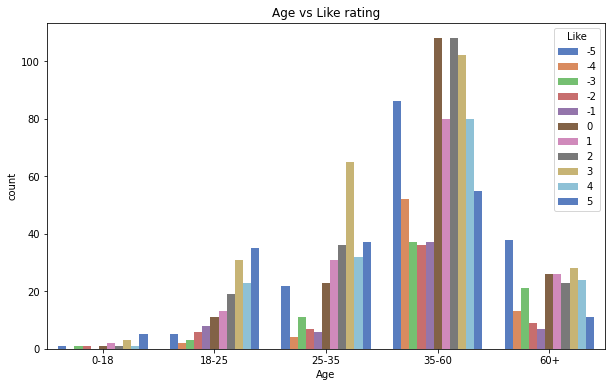

In [11]:
# like vs age

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Like', data=data, palette='muted')
plt.xlabel('Age')
plt.title('Age vs Like rating')
plt.show()


In [12]:
# value counts for visiting frequency
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [13]:
# Applying label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['yummy'] = le.fit_transform(data['yummy'])
data['convenient'] = le.fit_transform(data['convenient'])
data['spicy'] = le.fit_transform(data['spicy'])
data['greasy'] = le.fit_transform(data['greasy'])
data['fattening'] = le.fit_transform(data['fattening'])
data['fast'] = le.fit_transform(data['fast'])
data['expensive'] = le.fit_transform(data['expensive'])
data['tasty'] = le.fit_transform(data['tasty'])
data['healthy'] = le.fit_transform(data['healthy'])
data['disgusting'] = le.fit_transform(data['disgusting'])
data['cheap'] = le.fit_transform(data['cheap'])
data['Age'] = le.fit_transform(data['Age'])

data['VisitFrequency'] = le.fit_transform(data['VisitFrequency'])
data['Gender'] = le.fit_transform(data['Gender'])

In [14]:
data.dtypes

yummy             int32
convenient        int32
spicy             int32
fattening         int32
greasy            int32
fast              int32
cheap             int32
tasty             int32
expensive         int32
healthy           int32
disgusting        int32
Like              int64
Age               int32
VisitFrequency    int32
Gender            int32
dtype: object

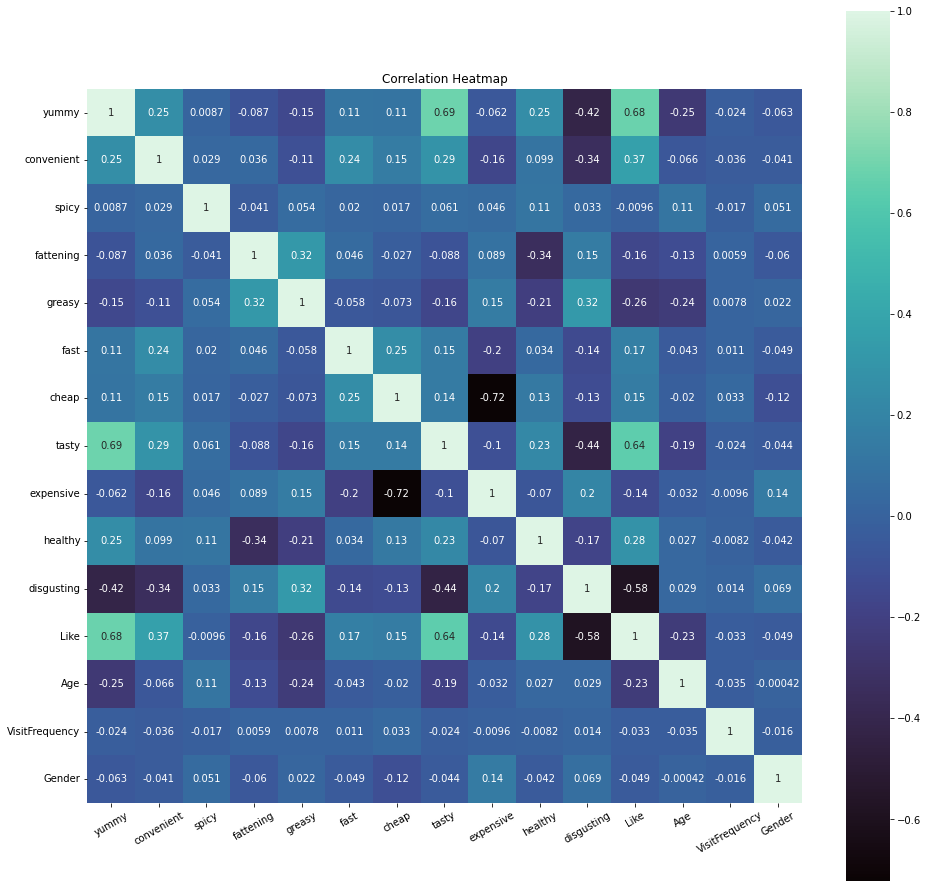

In [15]:
# Correlation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), square=True, annot=True, cmap='mako')
plt.xticks(rotation=30)
plt.title('Correlation Heatmap')
plt.show()

* Tasty and Yummy have similar correlation with other attributes so we can remove one of them.
* Somehow tasty food is highly correlated to disgusting food.
* Gender is weakly correlated to other attributes.

### MODEL BUILDING

In [16]:
data = data.drop(['yummy'], axis=1)
X = data.drop(['Gender'], axis=1)
X.nunique()

convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age                5
VisitFrequency     6
dtype: int64

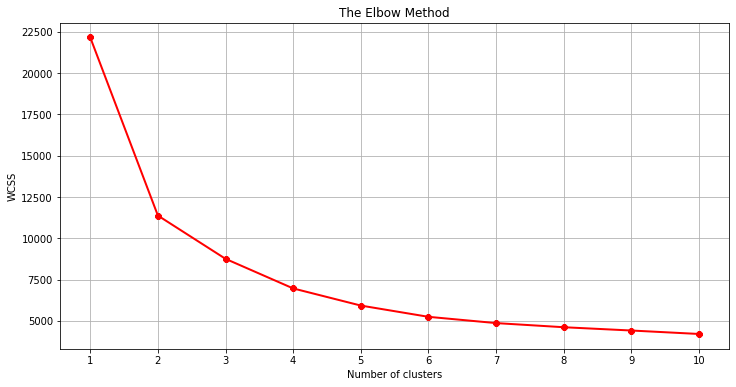

In [17]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

wcss = [] #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #Initialising 
    kmeans.fit(X) #Fitting on scaled features
    wcss.append(kmeans.inertia_) #Appending the wcss to the blank list
plt.figure(figsize=(12,6))  
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show() 

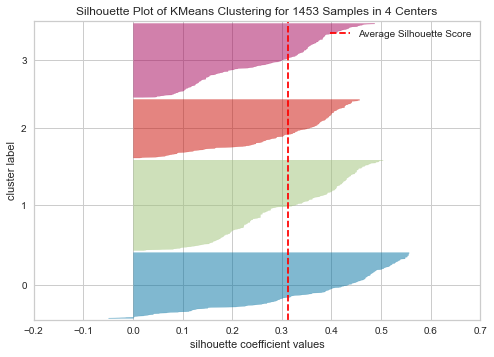

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans=KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #Initialising 
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [19]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 2 2 ... 1 2 0]


In [20]:
segment = pd.DataFrame(y_kmeans,columns=['Segment']) #Converting the cluster to data frame
segment.head()

,Segment
0,0
1,2
2,2
3,1
4,3
